In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
(train_image,train_lable),(test_image,test_lable) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [5]:
train_image.shape

(60000, 28, 28)

ERROR! Session/line number was not unique in database. History logging moved to new session 17


In [6]:
train_lable.shape

(60000,)

In [7]:
test_image.shape,test_lable.shape

((10000, 28, 28), (10000,))

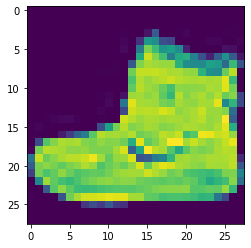

In [8]:
plt.imshow(train_image[0])

In [9]:
train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [13]:
train_lable.shape

(60000,)

In [14]:
#归一化
train_image = train_image/255
test_image = test_image/255

In [15]:
train_image.shape

(60000, 28, 28)

In [16]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))  #变成扁平向量 方便后续计算  28*28
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

ERROR! Session/line number was not unique in database. History logging moved to new session 20


In [17]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["acc"])      #标签值是顺序类型时候用这种损失函数   独热编码损失函数见下文

In [18]:
history = model.fit(train_image,train_lable,epochs=100)

Train on 60000 samples
Epoch 1/100


60000/60000 [==============================] - 2s 37us/sample - loss: 0.5001 - acc: 0.8246
Epoch 2/100
60000/60000 [==============================] - 2s 25us/sample - loss: 0.3732 - acc: 0.8645
Epoch 3/100
60000/60000 [==============================] - 2s 25us/sample - loss: 0.3368 - acc: 0.8764
Epoch 4/100
60000/60000 [==============================] - 1s 25us/sample - loss: 0.3110 - acc: 0.8859
Epoch 5/100
60000/60000 [==============================] - 2s 25us/sample - loss: 0.2935 - acc: 0.8924
Epoch 6/100
60000/60000 [==============================] - 1s 25us/sample - loss: 0.2799 - acc: 0.8962
Epoch 7/100
60000/60000 [==============================] - 1s 25us/sample - loss: 0.2678 - acc: 0.9005
Epoch 8/100
60000/60000 [==============================] - 2s 25us/sample - loss: 0.2589 - acc: 0.9040
Epoch 9/100
60000/60000 [==============================] - 1s 25us/sample - loss: 0.2485 - acc: 0.9071
Epoch 10/100
60000/60000 [==============================] - 1s 25us/sample - loss: 0.

In [19]:
model.evaluate(test_image,test_lable)

ERROR! Session/line number was not unique in database. History logging moved to new session 21
10000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.749207094720006, 0.8853]

In [20]:
train_lable

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [21]:
train_lable_onehot = tf.keras.utils.to_categorical(train_lable)

In [23]:
train_lable_onehot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [24]:
test_lable_onehot = tf.keras.utils.to_categorical(test_lable)

In [25]:
test_lable_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))  #变成扁平向量 方便后续计算  28*28
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [36]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             loss="categorical_crossentropy",
             metrics=["acc"])    #独热编码的损失函数

ERROR! Session/line number was not unique in database. History logging moved to new session 26


In [37]:
history = model.fit(train_image,train_lable_onehot,epochs=5)

Train on 60000 samples
Epoch 1/5


60000/60000 [==============================] - 2s 28us/sample - loss: 0.4747 - acc: 0.8319
Epoch 2/5
60000/60000 [==============================] - 2s 25us/sample - loss: 0.4246 - acc: 0.8487
Epoch 3/5
60000/60000 [==============================] - 2s 25us/sample - loss: 0.4039 - acc: 0.8553
Epoch 4/5
60000/60000 [==============================] - 1s 25us/sample - loss: 0.3948 - acc: 0.8579
Epoch 5/5
60000/60000 [==============================] - 1s 25us/sample - loss: 0.3823 - acc: 0.8626


In [38]:
predict = model.predict(test_image)

In [39]:
predict.shape

(10000, 10)

In [40]:
predict[0]

array([8.9042781e-13, 5.7795741e-14, 3.3676744e-21, 1.5884915e-20,
       1.2355718e-27, 2.1426791e-02, 2.4977028e-21, 1.3106980e-04,
       2.1646612e-12, 9.7844213e-01], dtype=float32)

In [41]:
np.argmax(predict[0])#取出概率最大值作为标签

9

In [43]:
test_lable[0]

9

model.summary()

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [54]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))  #变成扁平向量 方便后续计算  28*28
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

SyntaxError: invalid syntax (3292563337.py, line 5)

In [46]:
model.summary()   #增加层数 提高拟合能力

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             loss="categorical_crossentropy",
             metrics=["acc"])    #独热编码的损失函数

In [48]:
model.fit(train_image,train_lable_onehot,epochs=5)   #小心过拟合

Train on 60000 samples
Epoch 1/5


60000/60000 [==============================] - 2s 38us/sample - loss: 0.5961 - acc: 0.7886
Epoch 2/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.4738 - acc: 0.8351
Epoch 3/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.4354 - acc: 0.8483
Epoch 4/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.4370 - acc: 0.8481
Epoch 5/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.4219 - acc: 0.8519


In [49]:
history = model.fit(train_image,train_lable_onehot,epochs=10,validation_data = (test_image,test_lable_onehot))  #这个可看到验证集的损失和准确率

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.4097 - acc: 0.8558 - val_loss: 0.4681 - val_acc: 0.8425
Epoch 2/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.4019 - acc: 0.8582 - val_loss: 0.4596 - val_acc: 0.8418
Epoch 3/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.4064 - acc: 0.8582 - val_loss: 0.4751 - val_acc: 0.8441
Epoch 4/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.4088 - acc: 0.8572 - val_loss: 0.4498 - val_acc: 0.8453
Epoch 5/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3893 - acc: 0.8629 - val_loss: 0.4830 - val_acc: 0.8428
Epoch 6/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3875 - acc: 0.8636 - val_loss: 0.5028 - val_acc: 0.8293
Epoch 7/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3939 - acc: 0.8627 - val_loss: 0.

In [50]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

ERROR! Session/line number was not unique in database. History logging moved to new session 27


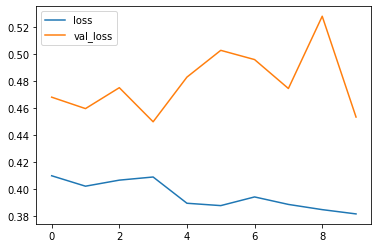

In [51]:
plt.plot(history.epoch,history.history.get("loss"),label="loss")
plt.plot(history.epoch,history.history.get("val_loss"),label="val_loss")
plt.legend()  #画图

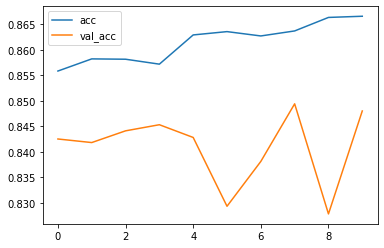

In [52]:
plt.plot(history.epoch,history.history.get("acc"),label="acc")
plt.plot(history.epoch,history.history.get("val_acc"),label="val_acc")
plt.legend()  #画图   有下图看出是一个过拟合

In [55]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))  #变成扁平向量 方便后续计算  28*28
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [56]:
model.summary() 

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [57]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             loss="categorical_crossentropy",
             metrics=["acc"])    #独热编码的损失函数|

In [58]:
model.fit(train_image,train_lable_onehot,epochs=5)

Train on 60000 samples
Epoch 1/5


60000/60000 [==============================] - 2s 40us/sample - loss: 1.5152 - acc: 0.4093
Epoch 2/5
60000/60000 [==============================] - 2s 36us/sample - loss: 1.5470 - acc: 0.3965
Epoch 3/5
60000/60000 [==============================] - 2s 35us/sample - loss: 1.5961 - acc: 0.3716
Epoch 4/5
60000/60000 [==============================] - 2s 35us/sample - loss: 1.5983 - acc: 0.3750
Epoch 5/5
60000/60000 [==============================] - 2s 36us/sample - loss: 1.5952 - acc: 0.3670


In [59]:
history = model.fit(train_image,train_lable_onehot,epochs=10,validation_data = (test_image,test_lable_onehot))  #这个可看到验证集的损失和准确率|

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 41us/sample - loss: 1.6377 - acc: 0.3489 - val_loss: 1.1885 - val_acc: 0.5537
Epoch 2/10
60000/60000 [==============================] - 2s 38us/sample - loss: 1.6332 - acc: 0.3417 - val_loss: 1.2247 - val_acc: 0.5141
Epoch 3/10
60000/60000 [==============================] - 2s 38us/sample - loss: 1.6535 - acc: 0.3248 - val_loss: 1.2091 - val_acc: 0.5068
Epoch 4/10
60000/60000 [==============================] - 2s 37us/sample - loss: 1.6624 - acc: 0.3408 - val_loss: 1.2015 - val_acc: 0.5341
Epoch 5/10
60000/60000 [==============================] - 2s 37us/sample - loss: 1.6695 - acc: 0.3374 - val_loss: 1.3143 - val_acc: 0.4855
Epoch 6/10
60000/60000 [==============================] - 2s 37us/sample - loss: 1.6306 - acc: 0.3496 - val_loss: 1.2386 - val_acc: 0.5256
Epoch 7/10
60000/60000 [==============================] - 2s 38us/sample - loss: 1.6539 - acc: 0.3435 - val_loss: 1.

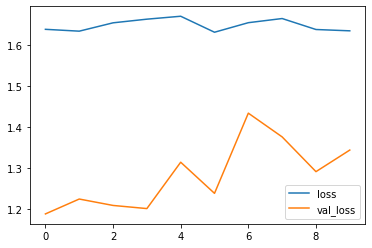

In [60]:
plt.plot(history.epoch,history.history.get("loss"),label="loss")
plt.plot(history.epoch,history.history.get("val_loss"),label="val_loss")
plt.legend()  #画图

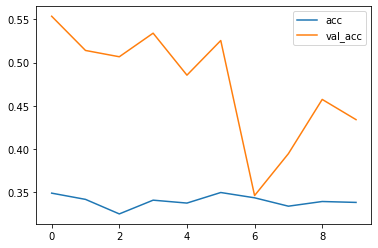

In [61]:
plt.plot(history.epoch,history.history.get("acc"),label="acc")
plt.plot(history.epoch,history.history.get("val_acc"),label="val_acc")
plt.legend()  #画图   有下图看出是一个过拟合

In [62]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))  #变成扁平向量 方便后续计算  28*28
model.add(tf.keras.layers.Dense(32,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))  #缩小网络规模 减小过拟合

In [66]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss="categorical_crossentropy",
             metrics=["acc"])    #独热编码的损失函数|

In [67]:
history = model.fit(train_image,train_lable_onehot,epochs=10,validation_data = (test_image,test_lable_onehot))  #这个可看到验证集的损失和准确率|

Train on 60000 samples, validate on 10000 samples
Epoch 1/10


60000/60000 [==============================] - 2s 31us/sample - loss: 0.3144 - acc: 0.8816 - val_loss: 0.4112 - val_acc: 0.8558
Epoch 2/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3064 - acc: 0.8848 - val_loss: 0.4008 - val_acc: 0.8575
Epoch 3/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3036 - acc: 0.8865 - val_loss: 0.4055 - val_acc: 0.8595
Epoch 4/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3012 - acc: 0.8868 - val_loss: 0.4084 - val_acc: 0.8565
Epoch 5/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3003 - acc: 0.8875 - val_loss: 0.4023 - val_acc: 0.8588
Epoch 6/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2978 - acc: 0.8881 - val_loss: 0.4039 - val_acc: 0.8589
Epoch 7/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2973 - acc: 0.8881 - val_loss: 0.4061 - val_acc: 0.8574
Epoch 8/10
60000/60000 [==============

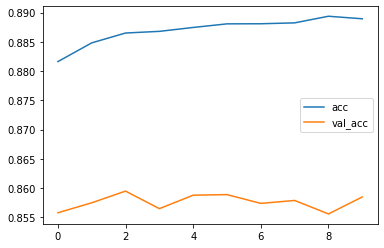

In [68]:
plt.plot(history.epoch,history.history.get("acc"),label="acc")
plt.plot(history.epoch,history.history.get("val_acc"),label="val_acc")
plt.legend()  #画图   有下图看出是一个过拟合

In [69]:
#使用tf.data改造 
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
(train_image,train_lable),(test_image,test_lable) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [72]:
#归一化
train_images = train_image/255
test_images = test_image/255

In [73]:
ds_train_img = tf.data.Dataset.from_tensor_slices(train_images)

In [74]:
ds_train_img

<TensorSliceDataset shapes: (28, 28), types: tf.float64>

In [76]:
train_image.shape

(60000, 28, 28)

In [77]:
ds_train_lab = tf.data.Dataset.from_tensor_slices(train_lable)  #tf.data 对数据源进行改造

In [78]:
ds_train_lab

<TensorSliceDataset shapes: (), types: tf.uint8>

In [80]:
ds_train = tf.data.Dataset.zip((ds_train_img,ds_train_lab))  #把对应的训练和标签对应起来

In [81]:
ds_train

<ZipDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>

In [82]:
ds_train = ds_train.shuffle(10000).repeat().batch(64)#对100000张图片进行乱序 

In [90]:
ds_test = tf.data.Dataset.from_tensor_slices((test_image,test_lable))  #不用zip直接变成对应批次的

In [91]:
ds_test

<TensorSliceDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>

In [92]:
ds_test = ds_test.batch(64) #不用shuffle 默认可以repeat

In [84]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))  #变成扁平向量 方便后续计算  28*28
model.add(tf.keras.layers.Dense(32,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))  #缩小网络规模 减小过拟合

In [85]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss="categorical_crossentropy",
             metrics=["acc"])    #独热编码的损失函数|

In [87]:
steps_per_epochs = train_image.shape[0]//64  #原来是没有批次的概念 因为这次有了批次所以变成每批次训练多少

ERROR! Session/line number was not unique in database. History logging moved to new session 35


In [88]:
model.fit(ds_train,epochs=5,steps_per_epoch=steps_per_epochs)

Train for 937 steps
Epoch 1/5
ERROR! Session/line number was not unique in database. History logging moved to new session 36


937/937 [==============================] - 2s 2ms/step - loss: 117.2340 - acc: 0.0000e+00
Epoch 2/5
937/937 [==============================] - 1s 1ms/step - loss: 168.2857 - acc: 0.0000e+00
Epoch 3/5
937/937 [==============================] - 1s 1ms/step - loss: 218.7518 - acc: 0.0000e+00
Epoch 4/5
937/937 [==============================] - 1s 1ms/step - loss: 266.0525 - acc: 0.0000e+00
Epoch 5/5
937/937 [==============================] - 1s 1ms/step - loss: 311.0947 - acc: 0.0000e+00


In [93]:
model.fit(ds_train,
          epochs=5,
          steps_per_epoch=steps_per_epochs,
          validation_data=ds_test,
          validation_steps=10000//64)  #把验证集也添加进去

Train for 937 steps, validate for 156 steps
Epoch 1/5
937/937 [==============================] - 1s 2ms/step - loss: 354.3776 - acc: 0.0000e+00 - val_loss: 25369.5135 - val_acc: 0.0000e+00
Epoch 2/5
937/937 [==============================] - 1s 1ms/step - loss: 397.1666 - acc: 0.0000e+00 - val_loss: 28401.5857 - val_acc: 0.0000e+00
Epoch 3/5
937/937 [==============================] - 1s 1ms/step - loss: 437.6984 - acc: 0.0000e+00 - val_loss: 31425.4080 - val_acc: 0.0000e+00
Epoch 4/5
937/937 [==============================] - 1s 1ms/step - loss: 478.0639 - acc: 0.0000e+00 - val_loss: 34318.5179 - val_acc: 0.0000e+00
Epoch 5/5
937/937 [==============================] - 1s 1ms/step - loss: 517.2319 - acc: 0.0000e+00 - val_loss: 37165.1327 - val_acc: 0.0000e+00
